# Task 1. Exploratory Data Analysis (EDA)

## Background Information

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

The relevant dataset is linked below for you. 

## Tasks

1. Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)


2. Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?


3. Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?


4. Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.


5. For a challenge – what insights can you draw from the location information provided in the dataset?


6. Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [2]:
import os
from datetime import *

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import matplotlib.gridspec as gridspec # Alignments

print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.3.2
Seaborn Version : 0.11.0


In [3]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is AA35-4C60

 Directory of D:\1. Data365\1. Data Analyst Portfolio\4. DataANZ

04/10/2021  10:19 AM    <DIR>          .
04/10/2021  10:19 AM    <DIR>          ..
03/10/2021  03:49 PM    <DIR>          .ipynb_checkpoints
04/10/2021  10:19 AM           251,625 1_DataANZ_Virtual_Internship_Program - Copy.ipynb
04/10/2021  09:42 AM           450,495 1_DataANZ_Virtual_Internship_Program.ipynb
03/10/2021  12:59 PM           330,622 1_DataANZ_Virtual_Internship_Program-Copy1.ipynb
03/10/2021  03:49 PM           464,612 1_DataANZ_Virtual_Internship_Program-Copy2.ipynb
01/10/2021  03:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  09:46 PM            17,348 DataANZ.docx
03/10/2021  11:00 PM           837,915 Model Answer for Task 1.pdf
               7 File(s)      4,135,341 bytes
               3 Dir(s)  125,639,290,880 bytes free


In [4]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 1000
# pd.set_option('display.max.rows', 100)

In [5]:
print(pd.get_option('display.max.columns'))
print(pd.get_option('display.max.rows'))

40
1000


## 1. Load the dataset

**card_present_flag** - A card-not-present (CNP) transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It’s most common for orders that happen remotely — over the phone, internet or mail.

**bpay_biller_code** - The biller code is a unique number required to process a BPAY® transaction and you can find it on your statement.


In [6]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
print(df.shape) # 12,043 rows and 23 columns
df.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## 2. Basic checks

In [7]:
# Check types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
# Check duplicates
df.duplicated().sum()

0

Many missing values in **bpay_biller_code** and **merchant_code**, and I might simply be able to drop the columns.

The following features have the same amount of missing data:
* card_present_flag
* merchant_id
* merchant_suburb
* merchant_state
* merchant_long_lat

It might be reasonable to think that if a row doesn't have a value in any of those columns, the row is unlikely to have values in the other columns as well.

In [9]:
# Check missing values
missing = df.isnull().sum()
missing = missing[missing >= 1]
per = round(missing/len(df)*100, 2)
pd.DataFrame({'Number of missing values':missing, 'Percentage (%)': per}).sort_values(by = 'Percentage (%)', ascending = False)

,Number of missing values,Percentage (%)
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


In [10]:
mis_val_cols = []

for col in df.columns:
    if df[col].isnull().sum() >= 1:
        mis_val_cols.append(col)

My inference seems right. The below code shows the rows that have missing values more than 3, and there are 4326 rows.

In [11]:
df.iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows
# df[mis_val_cols].iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,4348.50,2018-08-01,M,19,NaN,NaN,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,1203.75,2018-08-01,F,43,NaN,NaN,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,NaN,Luis,13537.75,2018-10-31,M,27,NaN,NaN,2018-10-31T21:00:00.000+0000,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit
12032,posted,NaN,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,NaN,Michelle,20699.90,2018-10-31,F,19,NaN,NaN,2018-10-31T22:00:00.000+0000,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,9349.51,2018-10-31,M,26,NaN,NaN,2018-10-31T23:00:00.000+0000,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,18127.50,2018-10-31,M,39,NaN,NaN,2018-10-31T23:00:00.000+0000,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit


Date starts from 2018-08-01 to 2018-10-31.

In [12]:
# Statistical summary for date
df.describe(include = 'datetime', datetime_is_numeric=True)

,date
count,12043
mean,2018-09-15 21:27:39.951812864
min,2018-08-01 00:00:00
25%,2018-08-24 00:00:00
50%,2018-09-16 00:00:00
75%,2018-10-09 00:00:00
max,2018-10-31 00:00:00


In [13]:
# Statistical summary for categorical features
df.describe(include = 'object')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,6033413d9a0442fbb36ca6c0eeed6e97,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [14]:
# Number of unique values in categorical columns
df.select_dtypes(include = 'O').nunique().sort_values()

country                  1
currency                 1
status                   2
gender                   2
movement                 2
bpay_biller_code         3
txn_description          6
merchant_state           8
first_name              80
long_lat               100
customer_id            100
account                100
merchant_suburb       1609
merchant_long_lat     2703
merchant_id           5725
extraction            9442
transaction_id       12043
dtype: int64

In [15]:
# Statistical summary for numerical features
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [16]:
# Number of unique values in numerical/date columns
df.select_dtypes(exclude = 'O').nunique().sort_values()

merchant_code            1
card_present_flag        2
age                     33
date                    91
amount                4457
balance              12006
dtype: int64

## 3. Some interesting overall insights

#### 3-1. The average of total transaction amount

In [17]:
df['amount'].mean()

187.93358797641767

In [20]:
# Show the percentage of each bar type plots 
def plot_height_per(df, ax):
    total = float(len(df))
    height_list = []
    for p in ax.patches:
        height = p.get_height()
        height_list.append(height)
        ax.text(p.get_x()+p.get_width()/2.,      
                height * 1.05,                  
                '{:.2%}'.format(height/total),   
                ha="center")
    
    height_list.sort()
    ax.set(ylim = (0, height_list[-1]*1.15))
    
def plot_height(df, ax):
#     total = float(len(df))
    height_list = []
    for p in ax.patches:
        height = p.get_height()
        height_list.append(height)
        ax.text(p.get_x()+p.get_width()/2.,      
                height * 1.05,                  
                '{}'.format(round(height)),   
                ha="center")
    
    height_list.sort()
    ax.set(ylim = (0, height_list[-1]*1.15))

#### 3-2. The total amount and average of each month

In [134]:
df['day_name'] = df['date'].dt.day_name()
df['week_num'] = df['date'].dt.isocalendar().week
df['month_name'] = df['date'].dt.month_name()

       Month      Total     Average
0     August  729935.52  185.121867
1    October  802798.47  196.427323
2  September  730550.21  182.045903


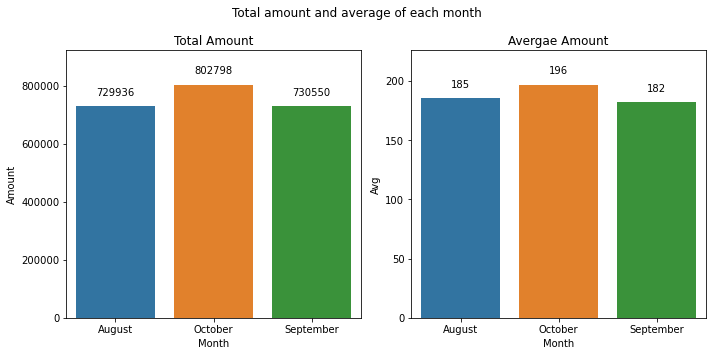

In [21]:
month_total = df.groupby('month_name')['amount'].sum().reset_index()
month_avg = df.groupby('month_name')['amount'].mean().reset_index()

print(pd.DataFrame({'Month' :month_total['month_name'], 'Total': month_total['amount'], 'Average':month_avg['amount']}))

fig, axes = plt.subplots(1,2, figsize = (10, 5))
# sns.axes_style("darkgrid")
fig.suptitle('Total amount and average of each month')

sns.barplot(ax = axes[0], data = month_total, x = 'month_name', y = 'amount')
axes[0].set_title('Total Amount')
axes[0].set(xlabel = 'Month', ylabel = 'Amount', ylim = (0, 900000))

sns.barplot(ax = axes[1], data = month_avg, x = 'month_name', y = 'amount')
axes[1].set_title('Avergae Amount')
axes[1].set(xlabel = 'Month', ylabel = 'Avg', ylim = (0, 300))

plot_height(month_total, axes[0])
plot_height(month_avg, axes[1])

plt.tight_layout()
plt.show()

#### 3-3. Transactions that customers make each month
Each customer makes about 40 transactions in every month

In [22]:
month_trans = df.groupby('month_name')['amount'].count().reset_index()
month_num_cust = df.groupby('month_name')['customer_id'].nunique().reset_index()
month_trans['mean'] = month_trans['amount'] / month_num_cust['customer_id']
month_trans.rename(columns = {'amount': 'count'}, inplace = True)

       Month  Total  Average
0     August   3943    39.43
1    October   4087    40.87
2  September   4013    40.13


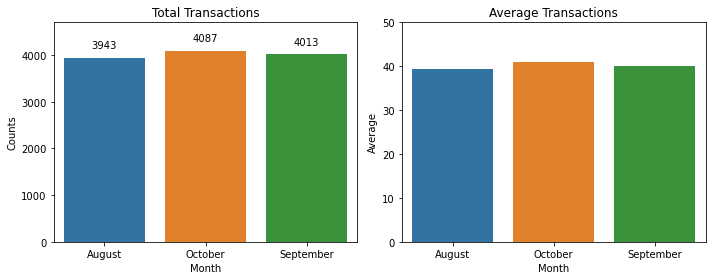

In [34]:
print(pd.DataFrame({'Month' :month_trans['month_name'], 'Total': month_trans['count'], 'Average':month_trans['mean']}))

fig, axes = plt.subplots(1,2, figsize = (10, 4))
# sns.axes_style("darkgrid")

sns.barplot(ax = axes[0], data = month_trans, x = 'month_name', y = 'count')
axes[0].set_title('Total Transactions')
axes[0].set(xlabel = 'Month', ylabel = 'Counts', ylim = (0, 4400))

sns.barplot(ax = axes[1], data = month_trans, x = 'month_name', y = 'mean')
axes[1].set_title('Average Transactions')
axes[1].set(xlabel = 'Month', ylabel = 'Average', ylim = (0, 50))

plot_height(month_trans, axes[0])
# plot_height(month_trans, axes[1])

plt.tight_layout()
plt.show()

## 4. Visualisation?

Segment the dataset by transaction date and time. 

Visualise transaction volume and spending over the course of an average day or week. 

Consider the effect of any outliers that may distort your analysis.

#### 4-1. Segment the dataset by transaction date and time.

There are some peaks hours 9, 11, 17 and 21 where transactions were largely generated.

In [359]:
# Add transaction_date and transaction_time
df['transaction_time'] = df['extraction'].astype(str).str[11:13] # 23  take only hours
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day_name,month_name,transaction_date,transaction_time,week_num
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,2018-08-01,01,31
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,2018-08-01,01,31
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,2018-08-01,01,31
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,2018-08-01,01,31
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,2018-08-01,01,31


Count each hour and calculate the mean. 

In [427]:
# df.groupby(['date','transaction_time'])['transaction_time'].count().unstack()
hr_count = df.groupby(['date','transaction_time'])['transaction_time'].count().unstack().fillna(0)
hrs = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
# the mean of number of hrs
hr_mean = hr_count[hrs].mean().reset_index().rename(columns = {0: 'mean'})

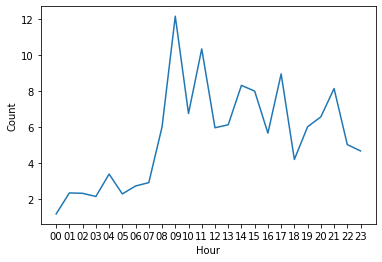

In [437]:
# plt.plot(df.groupby(['transaction_time'])['transaction_time'].count())
plt.plot(hr_mean['mean'])
plt.xlabel('Hour')
plt.xticks(np.arange(24), hr_mean['transaction_time'])
plt.ylabel('Count')
plt.show()

#### 4-2. Visualise transaction volume and spending over the course of an average day or week.

Amount is right skewed as the values in amount are mostly concentrated on between 0 and 70 and the outliers are on the right side. 

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


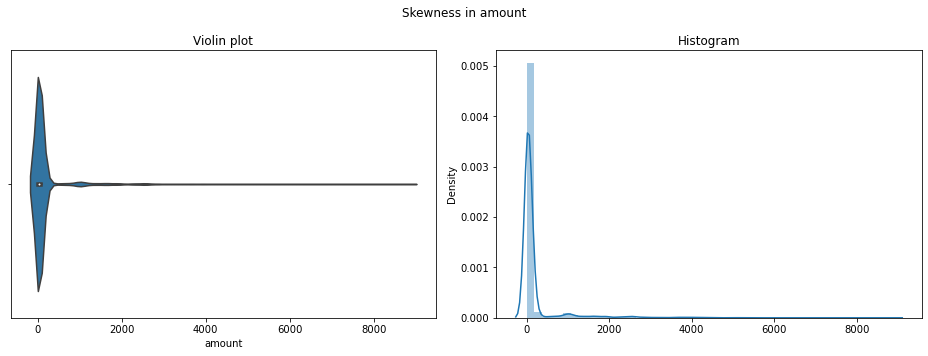

In [400]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
fig.suptitle('Skewness in amount')

# Boxplot
sns.violinplot(ax = axes[0], x=df['amount'])
axes[0].set_title('Violin plot')

# Histogram
sns.distplot(ax = axes[1], x = df['amount'])
axes[1].set_title('Histogram')

plt.tight_layout()

plt.show()

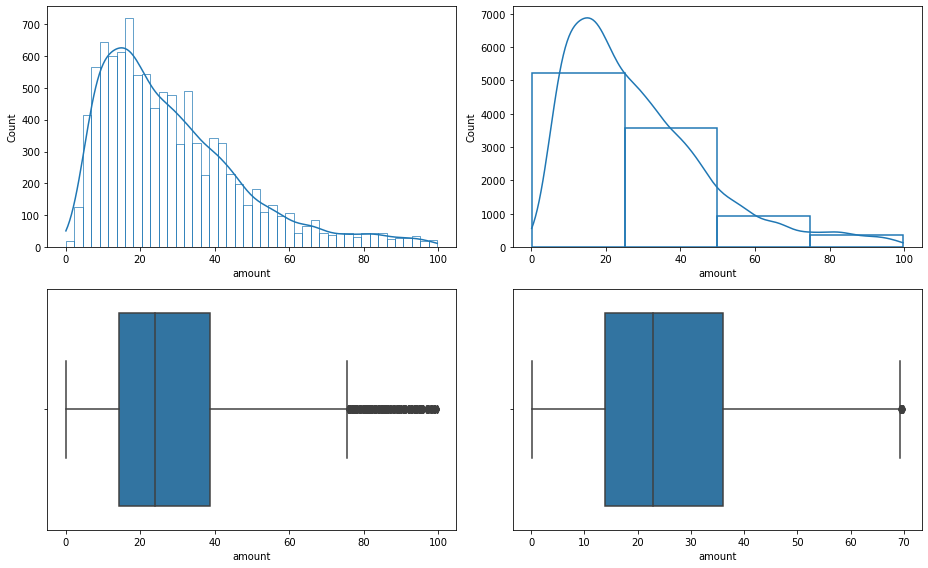

In [113]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))

# Histograms with amount less than 100 and with bin size 4 
sns.histplot(data = df[df['amount'] < 100], x='amount', fill = False, kde = True, ax = ax[0,0])
sns.histplot(data = df[df['amount'] < 100], x='amount', fill = False, kde = True, bins = 4, ax = ax[0,1])

# Boxplot with amount less than 100 and 70
sns.boxplot(data = df[df['amount'] < 100], x='amount', ax = ax[1,0])
sns.boxplot(data = df[df['amount'] < 70], x='amount', ax = ax[1,1])

plt.tight_layout()
plt.show()

In [ ]:
# cumulate
#        count transaction
# cust_1
# cust_2
# cust_3


#### Transaction amount and volumn by daily basis

* **Mon** - buy things expensive?

* **Fri** - the largest amount and volume because it is Friday. 

* **Sat, Sun** - high volumn, but not a large amount for its volumn.

In [246]:
df1 = df.copy()
df1['day_name'] = pd.Categorical(df['day_name'], categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered = True)
df1['day_name'].sort_values()

4209    Monday
9897    Monday
9898    Monday
9899    Monday
9900    Monday
         ...  
8838    Sunday
8839    Sunday
8840    Sunday
7946    Sunday
6021    Sunday
Name: day_name, Length: 12043, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

I noticed that the data doesn't have a record of Thursday in week 33. 

In [248]:
df1.groupby(['week_num','day_name'])['amount'].sum().reset_index().isnull().sum()

week_num    0
day_name    0
amount      7
dtype: int64

In [ ]:
a = df1.groupby(['week_num','day_name'])['amount'].sum().unstack().fillna(0)

# ['2018-08-05', '2018-08-12', '2018-08-19', '2018-08-26',
#        '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23',
#        '2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21',
#        '2018-10-28', '2018-11-04']

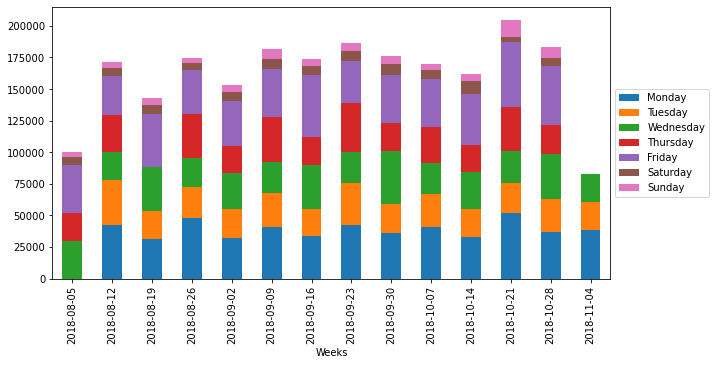

In [334]:
a.plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Weeks')
plt.xticks(np.arange(14), weekly_trans_amount['date'].astype(str))
plt.show()

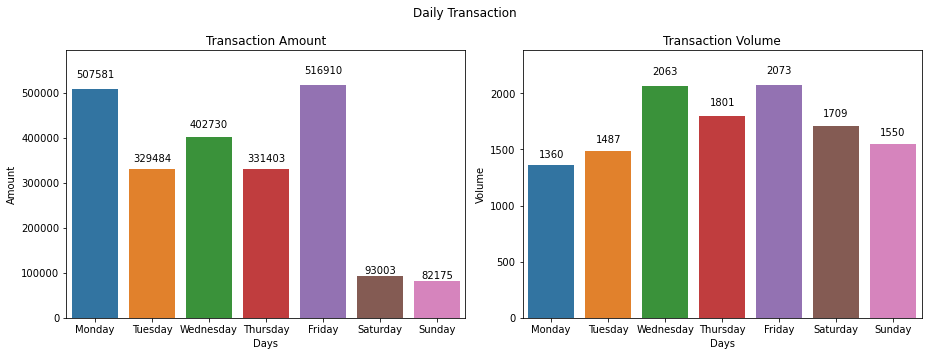

In [41]:
daily_spending = df.groupby('date_name')['amount'].sum().sort_values(ascending = False).reset_index()
daily_trans_vol = df.groupby('date_name')['amount'].count().sort_values(ascending = False).reset_index()

fig, axes = plt.subplots(1,2, figsize = (13,5))
fig.suptitle('Daily Transaction')

sns.barplot(ax = axes[0], data = daily_spending, x = 'date_name', y = 'amount', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
axes[0].set_title('Transaction Amount')
axes[0].set(xlabel = 'Days', ylabel = 'Amount')

sns.barplot(ax = axes[1], data = daily_trans_vol, x = 'date_name', y = 'amount', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].set_title('Transaction Volume')
axes[1].set(xlabel = 'Days', ylabel = 'Volume')

plot_height(daily_spending, axes[0])
plot_height(daily_trans_vol, axes[1])

plt.tight_layout()
plt.show()

#### Transaction amount and volumn by weekly basis.

In [174]:
# Separate transaction_date by weekly basis
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets
# df.groupby([pd.Grouper(key='date', freq='W')])['amount'].sum().reset_index().sort_values('date') # W - Mon to Sun, W-MON - Mon to Mon?
weekly_trans_amount = df.groupby([pd.Grouper(key='date', freq='W')])['amount'].sum().reset_index().sort_values('date')
weekly_trans_volume = df.groupby([pd.Grouper(key='date', freq='W')])['amount'].count().reset_index().sort_values('date')

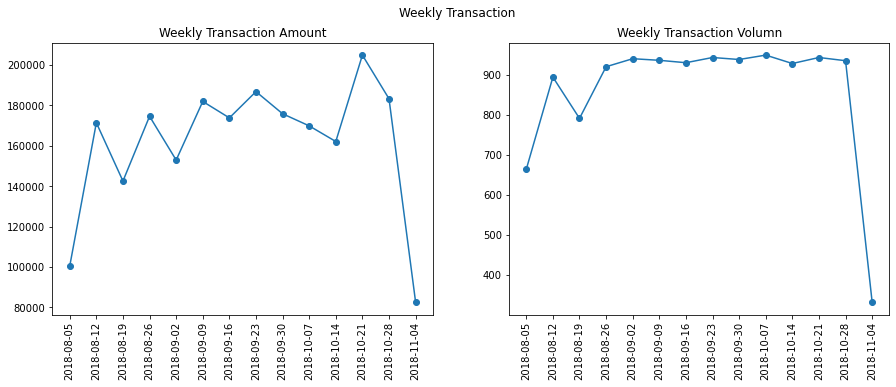

In [227]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Weekly Transaction')

# Transaction amount
ax[0].plot(weekly_trans_amount['date'], weekly_trans_amount['amount'], '-o')
ax[0].set_title('Weekly Transaction Amount')
ax[0].set_xticks(weekly_trans_amount['date'])
ax[0].set_xticklabels(weekly_trans_amount['date'].astype(str), rotation = 90)

# Transaction volume
ax[1].plot(weekly_trans_volume['date'], weekly_trans_volume['amount'], '-o')
ax[1].set_title('Weekly Transaction Volumn')
ax[1].set_xticks(weekly_trans_volume['date'])
ax[1].set_xticklabels(weekly_trans_volume['date'].astype(str), rotation = 90)

# sns.barplot(ax = ax[1], data = df.groupby(['week_num'])['amount'].count().reset_index(), x = 'week_num', y = 'amount')
# ax[1].set_title('Transaction Volume')
# ax[1].set(xlabel = 'Weeks',ylabel = 'Volume', ylim = (0, 1000))
# ax[1].set_xticklabels(weekly_trans_volume['date'].astype(str), rotation = 90)

plt.show()

### 5. Location (Suburb and state)

In [44]:
# df.merchant_state.nunique()
df.merchant_suburb.nunique()

1609

In [45]:
df.groupby('merchant_state')['amount'].sum()

merchant_state
ACT      4876.68
NSW    102021.77
NT       9168.89
QLD     53483.45
SA      16776.57
TAS      1962.93
VIC     87584.00
WA      33992.06
Name: amount, dtype: float64

In [336]:
mer_loc = df.groupby(['merchant_state'])['merchant_suburb'].nunique().reset_index()
mer_loc['amount'] = df.groupby('merchant_state')['amount'].sum().values
mer_loc.sort_values('merchant_suburb', ascending = False, inplace = True)

The number of distinct merchants in each state.

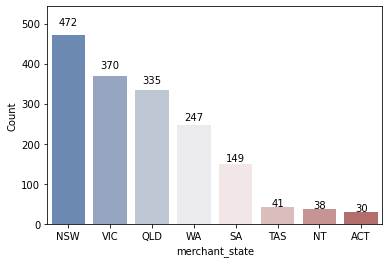

In [337]:
g = sns.barplot(data = mer_loc, x = 'merchant_state', y = 'merchant_suburb', palette="vlag")
g.set_ylabel('Count')
plot_height(mer_loc, g)
plt.show()

The amount that the merchants generated in each state

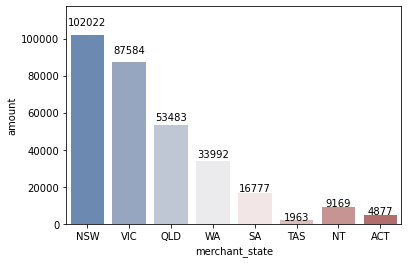

In [338]:
g = sns.barplot(data = mer_loc, x = 'merchant_state', y = 'amount', palette = 'vlag')
plot_height(mer_loc, g)
plt.show()

Number 2 is the sum of amount from rows where merchant_state and merchant_suburb are null. 

1. 309866.35000000015
2. 1953417.85
3. 2263284.2

1 + 2 = 3

In [339]:
# 1. amount with currently available values
print(mer_loc['amount'].sum())
# 2. amount with missing merchant_state and merchant_suburb
print(df['amount'][df['merchant_state'].isnull() | df['merchant_suburb'].isnull()].sum())
# 3. total amount of dataset
print(df['amount'].sum())

309866.35000000015
1953417.85
2263284.2


In [340]:
1953417.85 + 309866.35000000015

2263284.2

# 6. Summary

* The total transaction amount and volume are similar each month.

* Most of the transactions started being generating from 07 am.

* The amount of frequent spendings was between 0 and 50 and this amount was more than 90% of the total spending amount.

* Monday and Friday generated the highest transaction amounts, whereas Saturday and Sunday generated the lowest transaction amounts.

* Wednesday and Firday had the largest transaction amounts.

* Even though Saturday and Sunday had the lowest transaction amounts, they made high transaction volume for its amounts.

* Most of the merchants were located in NSW, VIC, SQL, WA and SA. 

* The sum of amount in TAS, NT and ACT is a bit higher than the amount of SA.

* The sum of amount in QLD, WA and SA is a bit higher than the amount of NSW. 
